In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1269.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1385.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1383.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1354.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1339.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1380.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1304.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1340.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1211.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1355.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1222.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1

In [3]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torch.optim as optim

In [10]:
#loading data into respective train, test and val loader from dataset
def load_data(path, batch_size, input_size):
    
    transform_dict={'src':transforms.Compose([transforms.CenterCrop(224), transforms.RandomRotation(5), transforms.RandomHorizontalFlip(),
                                              transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])}
    data1 = datasets.ImageFolder(root=path,transform=transform_dict['src'])
    data_loader=td.DataLoader(data1,batch_size,shuffle=True,drop_last=False,num_workers=0)  
    return data_loader

train_loader3=load_data(path=r'/kaggle/input/vegetable-image-dataset/Vegetable Images/train/', batch_size=32, input_size=[224,224])
test_loader3=load_data(path=r'/kaggle/input/vegetable-image-dataset/Vegetable Images/test/', batch_size=32, input_size=[224,224])
val_loader3=load_data(path=r'/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/', batch_size=32, input_size=[224,224])

**Model training with Googlenet Architecture**

In [6]:
model3 = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet')
optimizer3 = torch.optim.Adam(model3.parameters())
criterion3 = nn.CrossEntropyLoss()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.7/site-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


In [7]:
def train( model, train_loader,val_loader, criterion, optimizer,num_epochs):
      device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
      print("Device: {}".format(device))
      model.to(device)
      total_steps = len(train_loader)
      model.aux_logits=False
      t1 = time.time()
      accuracy1 = []
      loss1 = []
      val_acc=[]
      val_loss=[]
      for epoch in range(num_epochs):
          accu = 0
          lss = 0
          val_accu=0
          valid_loss=0
          for i,data in enumerate(train_loader):
              images, labels = data[0].to(device), data[1].to(device)
              # Forward pass
              outputs = model(images)
              loss = criterion(outputs, labels)
              # Backprop and optimisation
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()
              # Train accuracy
              total = labels.size(0)
              _,predicted = torch.max(outputs.data, 1)
              correct = (predicted == labels).sum().item()
              accu += (correct / total) * 100
              lss += loss.item()
          model.eval()  
          for i, data in enumerate(val_loader):
              val_images, val_labels = data[0].to(device), data[1].to(device)
              outputs = model(val_images)
              loss = criterion(outputs, val_labels)
              # Val accuracy
              total = val_labels.size(0)
              _,predicted = torch.max(outputs.data, 1)
              correct = (predicted == val_labels).sum().item()
              val_accu += (correct / total) * 100
              valid_loss += loss.item()
          val_acc.append(val_accu/len(val_loader))
          val_loss.append(valid_loss/len(val_loader))
          accuracy1.append(accu/len(train_loader))
          loss1.append(lss/len(train_loader))
          
          print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%, Validation Loss : {:.4f}, Validation Accuracy : {:.2f}%,'.format(epoch + 1, num_epochs,lss/len(train_loader) ,accu/len(train_loader), valid_loss/len(val_loader), val_accu/len(val_loader)))
      print("######## Training Finished in {} seconds ###########".format(time.time()-t1))
      return model, accuracy1, loss1,val_acc,val_loss

In [8]:
model3,accuracy3,loss3,val_acc3,val_loss3=train(model3, train_loader3,val_loader3, criterion3, optimizer3,num_epochs=30)

Device: cuda:0


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Epoch [1/30], Loss: 1.4093, Accuracy: 52.72%, Validation Loss : 0.9392, Validation Accuracy : 68.57%,
Epoch [2/30], Loss: 1.4907, Accuracy: 49.17%, Validation Loss : 1.0410, Validation Accuracy : 64.69%,
Epoch [3/30], Loss: 0.9595, Accuracy: 67.28%, Validation Loss : 0.7686, Validation Accuracy : 74.39%,
Epoch [4/30], Loss: 0.7544, Accuracy: 73.81%, Validation Loss : 0.7083, Validation Accuracy : 75.32%,
Epoch [5/30], Loss: 0.6439, Accuracy: 78.21%, Validation Loss : 0.5800, Validation Accuracy : 80.52%,
Epoch [6/30], Loss: 0.5071, Accuracy: 82.99%, Validation Loss : 0.4223, Validation Accuracy : 85.80%,
Epoch [7/30], Loss: 0.4233, Accuracy: 85.67%, Validation Loss : 0.4067, Validation Accuracy : 86.26%,
Epoch [8/30], Loss: 0.4055, Accuracy: 86.61%, Validation Loss : 0.4612, Validation Accuracy : 86.61%,
Epoch [9/30], Loss: 0.3085, Accuracy: 89.89%, Validation Loss : 0.3336, Validation Accuracy : 88.39%,
Epoch [10/30], Loss: 0.2708, Accuracy: 91.20%, Validation Loss : 0.3009, Validatio

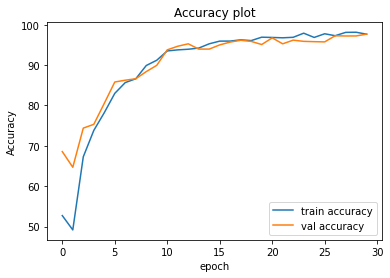

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.plot(accuracy3,label='train accuracy')
plt.plot(val_acc3,label='val accuracy')    
plt.legend()

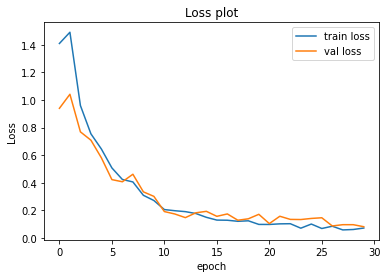

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(loss3,label='train loss')
plt.plot(val_loss3,label='val loss')
    
plt.legend()

In [11]:
model3.eval() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model3 = model3.to(device)
with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader3:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'
        .format(total, (correct / total) * 100))

Test Accuracy of the model on the 3000 test images: 97.43333333333334 %


In [12]:
torch.save(model3, 'model_googlenet3.pt')

Evaluating the performance of model using confusion matrix and classification report

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


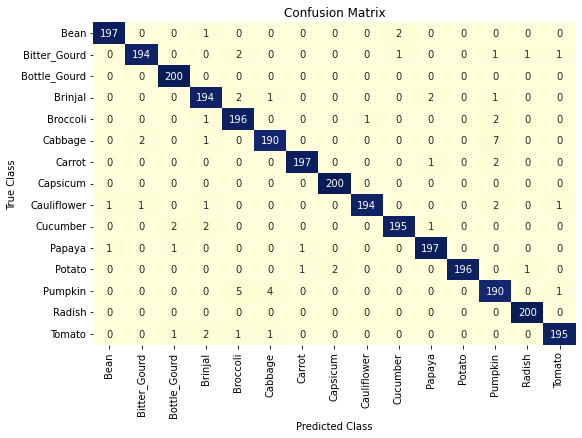

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = []
y_pred = []
 
for data in test_loader3:
  images,labels=data[0].to(device),data[1]
  y_true.extend(labels.numpy())
  outputs=model3(images)
  _, predicted = torch.max(outputs, 1)
  y_pred.extend(predicted.cpu().numpy())

cf_matrix = confusion_matrix(y_true, y_pred)
class_names = ('Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal',
           'Broccoli', 'Cabbage', 'Carrot', 'Capsicum', 'Cauliflower', 'Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Bean       0.99      0.98      0.99       200
Bitter_Gourd       0.98      0.97      0.98       200
Bottle_Gourd       0.98      1.00      0.99       200
     Brinjal       0.96      0.97      0.97       200
    Broccoli       0.95      0.98      0.97       200
     Cabbage       0.97      0.95      0.96       200
      Carrot       0.99      0.98      0.99       200
    Capsicum       0.99      1.00      1.00       200
 Cauliflower       0.99      0.97      0.98       200
    Cucumber       0.98      0.97      0.98       200
      Papaya       0.98      0.98      0.98       200
      Potato       1.00      0.98      0.99       200
     Pumpkin       0.93      0.95      0.94       200
      Radish       0.99      1.00      1.00       200
      Tomato       0.98      0.97      0.98       200

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98   

TSNE Visualization

In [48]:
data=datasets.ImageFolder(root=r'/kaggle/input/vegetable-image-dataset/Vegetable Images/train/')
random=0
X=[]
Y=[]
for x,y in data:
                          xrs=x.resize((64,64))
                          img=np.array(xrs).reshape(64*64*3)
                          X.append(img)
                          Y.append(y)
arrX=np.array(X)
arrY=np.array(Y)


In [57]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(arrX)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.141s...
[t-SNE] Computed neighbors for 15000 samples in 138.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:882: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  val in data


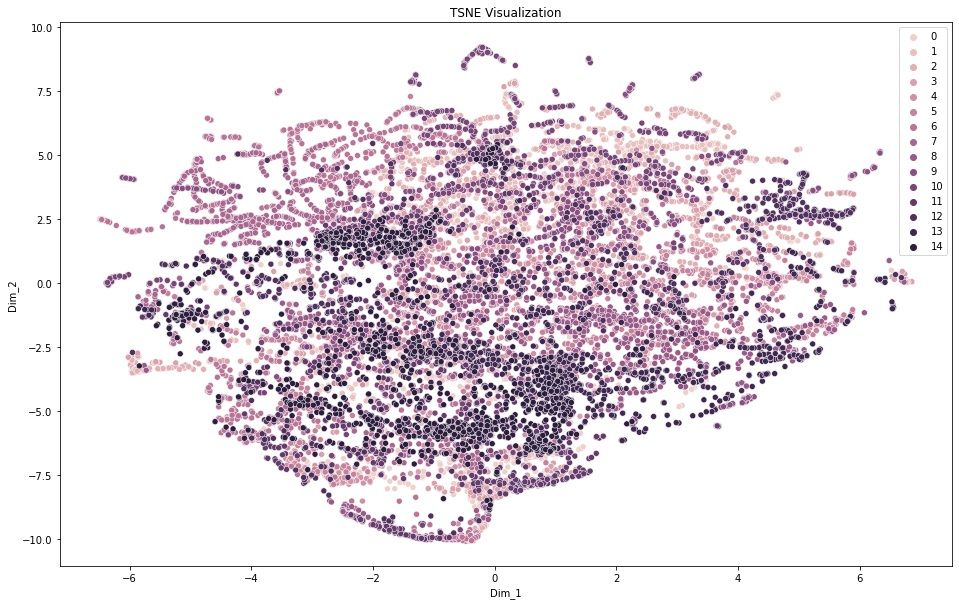

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(tsne[:,0],tsne[:,1],hue=Y,data=data,legend="full")
# Using Plt.scatter, visualize the transformed data marked with their corresponding label in 2D embedding.
plt.title('TSNE Visualization')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.show()
plt.close()

**Model training with Resnet18 Architecture**

In [46]:
model4 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18')
optimizer4 = torch.optim.Adam(model4.parameters())
criterion4 = nn.CrossEntropyLoss()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [47]:
model4,accuracy4,loss4,val_acc4,val_loss4=train(model4, train_loader3,val_loader3, criterion4, optimizer4,num_epochs=30)

Device: cuda:0
Epoch [1/30], Loss: 1.1095, Accuracy: 64.65%, Validation Loss : 0.8187, Validation Accuracy : 74.12%,
Epoch [2/30], Loss: 0.9474, Accuracy: 69.23%, Validation Loss : 0.5600, Validation Accuracy : 82.49%,
Epoch [3/30], Loss: 0.4721, Accuracy: 84.92%, Validation Loss : 0.4099, Validation Accuracy : 87.67%,
Epoch [4/30], Loss: 0.2761, Accuracy: 91.44%, Validation Loss : 0.2458, Validation Accuracy : 92.69%,
Epoch [5/30], Loss: 0.2096, Accuracy: 93.50%, Validation Loss : 0.1978, Validation Accuracy : 93.95%,
Epoch [6/30], Loss: 0.1624, Accuracy: 95.08%, Validation Loss : 0.1473, Validation Accuracy : 95.51%,
Epoch [7/30], Loss: 0.1342, Accuracy: 95.97%, Validation Loss : 0.1023, Validation Accuracy : 97.13%,
Epoch [8/30], Loss: 0.1211, Accuracy: 96.39%, Validation Loss : 0.1192, Validation Accuracy : 96.76%,
Epoch [9/30], Loss: 0.0974, Accuracy: 97.00%, Validation Loss : 0.0661, Validation Accuracy : 98.07%,
Epoch [10/30], Loss: 0.0781, Accuracy: 97.70%, Validation Loss : 0.

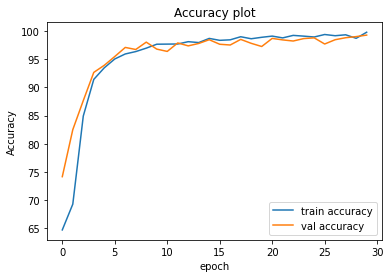

In [48]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.plot(accuracy4,label='train accuracy')
plt.plot(val_acc4,label='val accuracy')    
plt.legend()

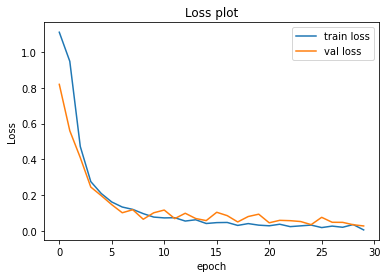

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(loss4,label='train loss')
plt.plot(val_loss4,label='val loss')
    
plt.legend()

In [50]:
model4.eval() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model4 = model4.to(device)
with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader3:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'
        .format(total, (correct / total) * 100))

Test Accuracy of the model on the 3000 test images: 99.1 %


In [51]:
torch.save(model4, 'model_resnet4.pt')
#model = torch.load('model_resnet4.pt')
#model.eval()

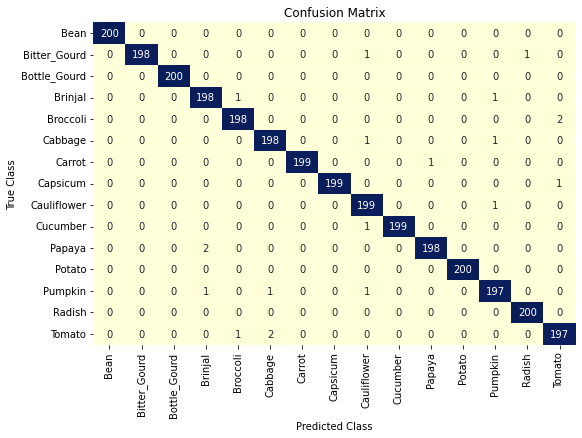

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = []
y_pred = []
 
for data in test_loader3:
  images,labels=data[0].to(device),data[1]
  y_true.extend(labels.numpy())
  outputs=model4(images)
  _, predicted = torch.max(outputs, 1)
  y_pred.extend(predicted.cpu().numpy())

cf_matrix = confusion_matrix(y_true, y_pred)
class_names = ('Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal',
           'Broccoli', 'Cabbage', 'Carrot', 'Capsicum', 'Cauliflower', 'Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

In [53]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00       200
Bitter_Gourd       1.00      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.99      0.99      0.99       200
    Broccoli       0.99      0.99      0.99       200
     Cabbage       0.99      0.99      0.99       200
      Carrot       1.00      0.99      1.00       200
    Capsicum       1.00      0.99      1.00       200
 Cauliflower       0.98      0.99      0.99       200
    Cucumber       1.00      0.99      1.00       200
      Papaya       0.99      0.99      0.99       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.98      0.98      0.98       200
      Radish       1.00      1.00      1.00       200
      Tomato       0.98      0.98      0.98       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99   

**Model Training with Alexnet Architecture**

In [54]:
model5 =torch.hub.load('pytorch/vision:v0.10.0', 'alexnet')
optimizer2 = torch.optim.Adam(model5.parameters())
criterion2 = nn.CrossEntropyLoss()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [55]:
model5,accuracy5,loss5,val_acc5,val_loss5=train( model5, train_loader3,val_loader3, criterion2, optimizer2,num_epochs=30)

Device: cuda:0
Epoch [1/30], Loss: 2.1660, Accuracy: 28.04%, Validation Loss : 1.4915, Validation Accuracy : 49.98%,
Epoch [2/30], Loss: 1.1654, Accuracy: 60.60%, Validation Loss : 0.8545, Validation Accuracy : 71.80%,
Epoch [3/30], Loss: 0.8147, Accuracy: 72.84%, Validation Loss : 0.8165, Validation Accuracy : 72.20%,
Epoch [4/30], Loss: 0.6026, Accuracy: 79.82%, Validation Loss : 0.5539, Validation Accuracy : 81.36%,
Epoch [5/30], Loss: 0.4876, Accuracy: 83.85%, Validation Loss : 0.5285, Validation Accuracy : 84.65%,
Epoch [6/30], Loss: 0.3780, Accuracy: 87.72%, Validation Loss : 0.4194, Validation Accuracy : 86.33%,
Epoch [7/30], Loss: 0.3241, Accuracy: 89.40%, Validation Loss : 0.4823, Validation Accuracy : 85.48%,
Epoch [8/30], Loss: 0.2871, Accuracy: 90.51%, Validation Loss : 0.4771, Validation Accuracy : 84.97%,
Epoch [9/30], Loss: 0.2703, Accuracy: 91.18%, Validation Loss : 0.4286, Validation Accuracy : 87.70%,
Epoch [10/30], Loss: 0.2357, Accuracy: 92.46%, Validation Loss : 0.

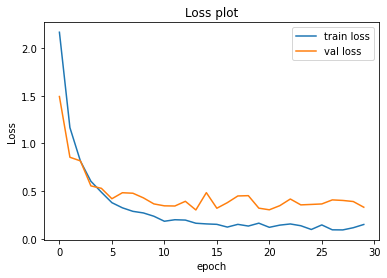

In [56]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(loss5,label='train loss')
plt.plot(val_loss5,label='val loss')
    
plt.legend()

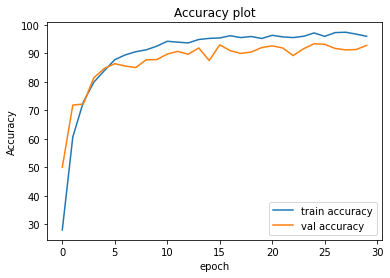

In [57]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.plot(accuracy5,label='train accuracy')
plt.plot(val_acc5,label='val accuracy')    
plt.legend()

In [58]:
model5.eval() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model5 = model5.to(device)
with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader3:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'
        .format(total, (correct / total) * 100))

Test Accuracy of the model on the 3000 test images: 92.86666666666666 %


In [59]:
torch.save(model5, 'model_alexnet5.pt')
#model = torch.load('model_resnet5.pt')
#model.eval()

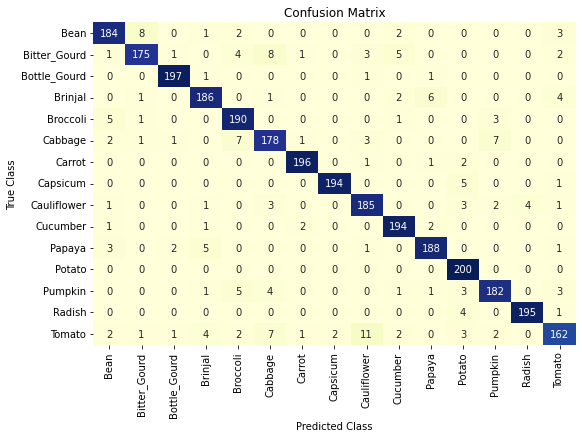

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = []
y_pred = []
 
for data in test_loader3:
  images,labels=data[0].to(device),data[1]
  y_true.extend(labels.numpy())
  outputs=model5(images)
  _, predicted = torch.max(outputs, 1)
  y_pred.extend(predicted.cpu().numpy())

cf_matrix = confusion_matrix(y_true, y_pred)
class_names = ('Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal',
           'Broccoli', 'Cabbage', 'Carrot', 'Capsicum', 'Cauliflower', 'Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

In [61]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Bean       0.92      0.92      0.92       200
Bitter_Gourd       0.94      0.88      0.90       200
Bottle_Gourd       0.98      0.98      0.98       200
     Brinjal       0.93      0.93      0.93       200
    Broccoli       0.90      0.95      0.93       200
     Cabbage       0.89      0.89      0.89       200
      Carrot       0.98      0.98      0.98       200
    Capsicum       0.99      0.97      0.98       200
 Cauliflower       0.90      0.93      0.91       200
    Cucumber       0.94      0.97      0.95       200
      Papaya       0.94      0.94      0.94       200
      Potato       0.91      1.00      0.95       200
     Pumpkin       0.93      0.91      0.92       200
      Radish       0.98      0.97      0.98       200
      Tomato       0.91      0.81      0.86       200

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.93      3000
weighted avg       0.94   